In [211]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [171]:
num_rounds = 10
num_trials = 20

In [200]:
#change these to get desired results
#10,2,25
p = 30
k = 2
n = 400

In [205]:
with open(f"results/results_multiround_optimal_{p}_{k}_{n}.txt") as file:
    results_optimal = json.load(file)
with open(f"results/results_multiround_random_{p}_{k}_{n}.txt") as file:
    results_random = json.load(file)
with open(f"results/results_multiround_half_{p}_{k}_{n}.txt") as file:
    results_half = json.load(file)
w = .2

In [208]:
data_optimal = pd.DataFrame({'x':range(num_rounds),
                             'y':[np.mean(results_optimal[str(i)]) for i in range(num_rounds)],
                             'ymin':[np.mean(results_optimal[str(i)])-w*np.std(results_optimal[str(i)]) for i in range(num_rounds)],
                             'ymax':[np.mean(results_optimal[str(i)])+w*np.std(results_optimal[str(i)]) for i in range(num_rounds)],
                             'Legend':['optimal']*num_rounds
                            })
data_random = pd.DataFrame({'x':range(num_rounds),
                             'y':[np.mean(results_random[str(i)]) for i in range(num_rounds)],
                             'ymin':[np.mean(results_random[str(i)])-w*np.std(results_random[str(i)]) for i in range(num_rounds)],
                             'ymax':[np.mean(results_random[str(i)])+w*np.std(results_random[str(i)]) for i in range(num_rounds)],
                             'Legend':['random']*num_rounds
                            })
data_half = pd.DataFrame({'x':range(num_rounds),
                             'y':[np.mean(results_half[str(i)]) for i in range(num_rounds)],
                             'ymin':[np.mean(results_half[str(i)])-w*np.std(results_half[str(i)]) for i in range(num_rounds)],
                             'ymax':[np.mean(results_half[str(i)])+w*np.std(results_half[str(i)]) for i in range(num_rounds)],
                             'Legend':['half']*num_rounds
                            })
data = pd.concat([data_optimal, data_random, data_half])

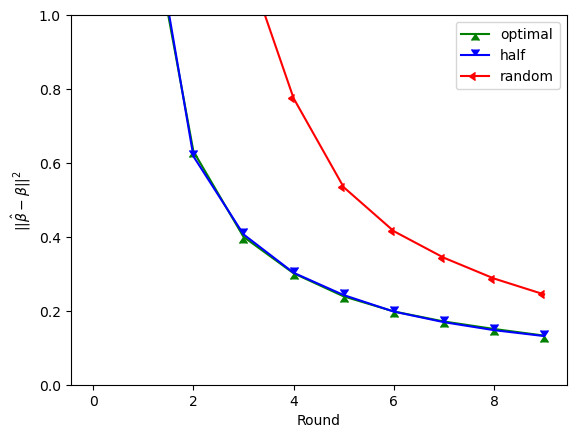

In [209]:
import matplotlib
plt.plot(range(num_rounds), [np.mean(results_optimal[str(i)]) for i in range(num_rounds)], label = "optimal",marker=6,color="g")
plt.plot(range(num_rounds), [np.mean(results_half[str(i)]) for i in range(num_rounds)], label = "half", marker = 7,color = "b")
plt.plot(range(num_rounds), [np.mean(results_random[str(i)]) for i in range(num_rounds)], label = "random", marker=8, color = "r")
plt.xlabel("Round")
plt.ylabel(r'$||\hat{\beta}-\beta||^2$')
plt.legend()
plt.ylim(0,1)
plt.savefig(f"multiround_{p}_{n}_{k}.png")


In [215]:
plot = (ggplot(data, aes(x='x',y='y',group='Legend',color='Legend'))
        +geom_line()
        +geom_errorbar(aes(ymin='ymin',ymax='ymax'),width = .5)
        +labs(x = 'Round', y = r'$||\hat{\beta}-\beta||^2$')
        +theme_light()
        +ylim(0,1)
       )

In [218]:
plot.save(f"multiround_{p}_{k}_{n}_graph.png")

/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:616: PlotnineWarning: Filename: multiround_30_2_400_graph.png
/opt/anaconda3/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_errorbar : Removed 8 rows containing missing values.
